# Python 3: Linear Regression

In [ ]:
!pip install numpy pandas matplotlib scikit-learn seaborn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('student_performance.csv')
df

,Unnamed: 0,age,study_time,failures,family_support,extra_educational_support,internet,romantic,free_time,going_out,health,absences,G1,G2,G3
0,0,17,2,2,no,no,yes,yes,1,4,3,1,5,7,3.1
1,1,18,3,3,no,yes,yes,yes,3,5,4,2,5,12,7.2
2,2,15,1,1,no,yes,yes,yes,3,1,4,5,17,14,16.4
3,3,17,1,3,no,yes,yes,no,4,3,2,2,9,17,12.4
4,4,17,1,3,yes,no,no,yes,5,5,5,9,8,16,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,15,1,0,no,yes,no,no,5,3,2,18,7,17,14.2
996,996,15,2,2,no,no,yes,no,4,2,1,5,7,17,11.0
997,997,18,1,0,no,yes,no,yes,3,2,5,17,9,14,13.5
998,998,18,3,1,no,no,no,yes,1,4,2,9,15,6,11.1


In [15]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


Unnamed: 0                   0
age                          0
study_time                   0
failures                     0
family_support               0
extra_educational_support    0
internet                     0
romantic                     0
free_time                    0
going_out                    0
health                       0
absences                     0
G1                           0
G2                           0
G3                           0
dtype: int64

In [16]:
df.describe()

,Unnamed: 0,age,study_time,failures,free_time,going_out,health,absences,G1,G2,G3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,16.534000,2.414000,1.461000,3.049000,2.942000,3.022000,12.008000,11.038000,10.950000,11.597600
std,288.819436,1.151595,1.095356,1.119702,1.401629,1.417973,1.421104,7.179379,3.813542,3.865805,3.395383
min,0.000000,15.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,5.000000,5.000000,3.100000
25%,249.750000,15.000000,1.000000,0.000000,2.000000,2.000000,2.000000,6.000000,8.000000,8.000000,9.200000
50%,499.500000,17.000000,2.000000,1.000000,3.000000,3.000000,3.000000,12.000000,11.000000,11.000000,11.500000
75%,749.250000,18.000000,3.000000,2.000000,4.000000,4.000000,4.000000,18.000000,14.000000,14.000000,13.925000
max,999.000000,18.000000,4.000000,3.000000,5.000000,5.000000,5.000000,24.000000,17.000000,17.000000,20.000000


In [19]:
# >= 10 points on G3 กี่คน? คิดเป็นกี่ %
(df['G3'] >= 10).mean() * 100

np.float64(67.60000000000001)

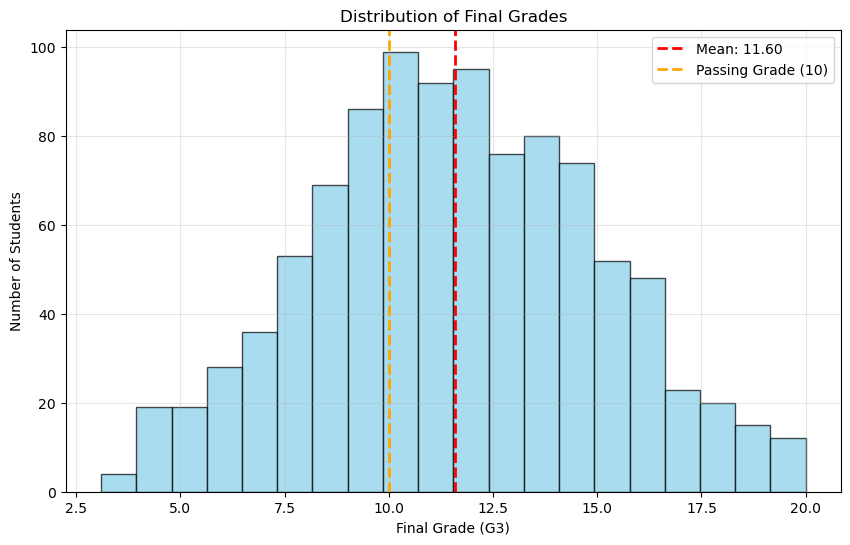

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['G3'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(df['G3'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["G3"].mean():.2f}')
plt.axvline(10, color='orange', linestyle='--', linewidth=2, label='Passing Grade (10)')

plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.title('Distribution of Final Grades')
plt.legend()
plt.grid(True, alpha=0.3)


plt.show()

## การที่มี Family Support ส่งผลต่อคะแนน G3 ไหม?

In [26]:
mean_fam_support = df[df['family_support'] == 'yes']['G3'].mean()
mean_no_fam_support = df[df['family_support'] == 'no']['G3'].mean()
print(mean_fam_support, mean_no_fam_support)

12.269747899159665 10.98702290076336


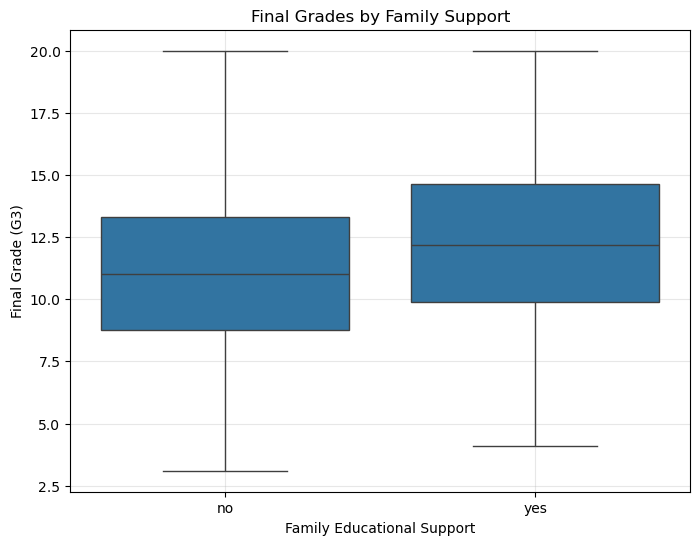

In [27]:
fig2 = plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='family_support', y='G3')
plt.xlabel('Family Educational Support')
plt.ylabel('Final Grade (G3)')
plt.title('Final Grades by Family Support')
plt.grid(True, alpha=0.3)
plt.show()

## การที่มี extra_educational_support, internet, romantic ส่งผลต่อคะแนน G3 ไหม?

In [29]:
print(df[df['extra_educational_support'] == 'yes']['G3'].mean(), df[df['extra_educational_support'] == 'no']['G3'].mean())
print(df[df['internet'] == 'yes']['G3'].mean(), df[df['internet'] == 'no']['G3'].mean())
print(df[df['romantic'] == 'yes']['G3'].mean(), df[df['romantic'] == 'no']['G3'].mean())

11.775146771037182 11.412065439672801
11.76070038910506 11.425102880658436
11.487426326129667 11.711812627291243


## การที่ study_time สูง = คะแนน G3 สูงด้วยหรือไม่?

In [31]:
# 10.45
print(df[df['study_time'] == 1]['G3'].mean())
print(df[df['study_time'] == 2]['G3'].mean())
print(df[df['study_time'] == 3]['G3'].mean())
print(df[df['study_time'] == 4]['G3'].mean())

10.458801498127341
11.139923954372625
12.049806949806948
13.054028436018958


## Correlation Matrix

In [33]:
numerical_cols = ['age', 'study_time', 'failures', 'free_time', 'going_out', 'health', 'absences', 'G1', 'G2', 'G3']

In [34]:
correlation_matx = df[numerical_cols].corr()
correlation_matx

,age,study_time,failures,free_time,going_out,health,absences,G1,G2,G3
age,1.000000,0.025334,0.030141,0.001758,0.009178,-0.020031,-0.027880,0.025690,-0.000292,0.012872
study_time,0.025334,1.000000,-0.034976,0.008942,-0.011593,0.008933,0.031019,0.008691,-0.013073,0.278781
failures,0.030141,-0.034976,1.000000,-0.046299,0.028836,0.006831,0.038392,-0.038567,-0.011089,-0.435831
free_time,0.001758,0.008942,-0.046299,1.000000,-0.008642,0.044687,-0.039829,0.001149,0.003593,0.015211
going_out,0.009178,-0.011593,0.028836,-0.008642,1.000000,0.028452,-0.027683,-0.013846,-0.058235,-0.067205
health,-0.020031,0.008933,0.006831,0.044687,0.028452,1.000000,0.051786,-0.031000,-0.016016,-0.021357
absences,-0.027880,0.031019,0.038392,-0.039829,-0.027683,0.051786,1.000000,0.027008,-0.018849,-0.002373
G1,0.025690,0.008691,-0.038567,0.001149,-0.013846,-0.031000,0.027008,1.000000,-0.002994,0.571992
G2,-0.000292,-0.013073,-0.011089,0.003593,-0.058235,-0.016016,-0.018849,-0.002994,1.000000,0.567766
G3,0.012872,0.278781,-0.435831,0.015211,-0.067205,-0.021357,-0.002373,0.571992,0.567766,1.000000


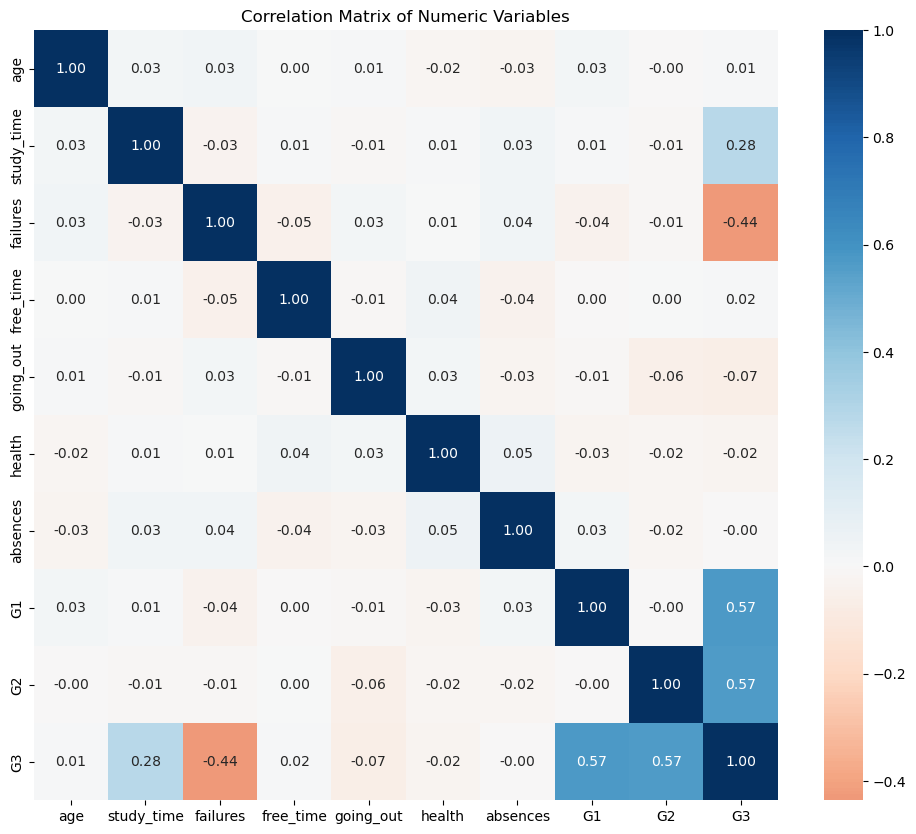

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matx, annot=True, cmap='RdBu', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [40]:
df_selected_features = df[['study_time', 'failures', 'G1', 'G2', 'G3']]
df_selected_features

,study_time,failures,G1,G2,G3
0,2,2,5,7,3.1
1,3,3,5,12,7.2
2,1,1,17,14,16.4
3,1,3,9,17,12.4
4,1,3,8,16,9.8
...,...,...,...,...,...
995,1,0,7,17,14.2
996,2,2,7,17,11.0
997,1,0,9,14,13.5
998,3,1,15,6,11.1


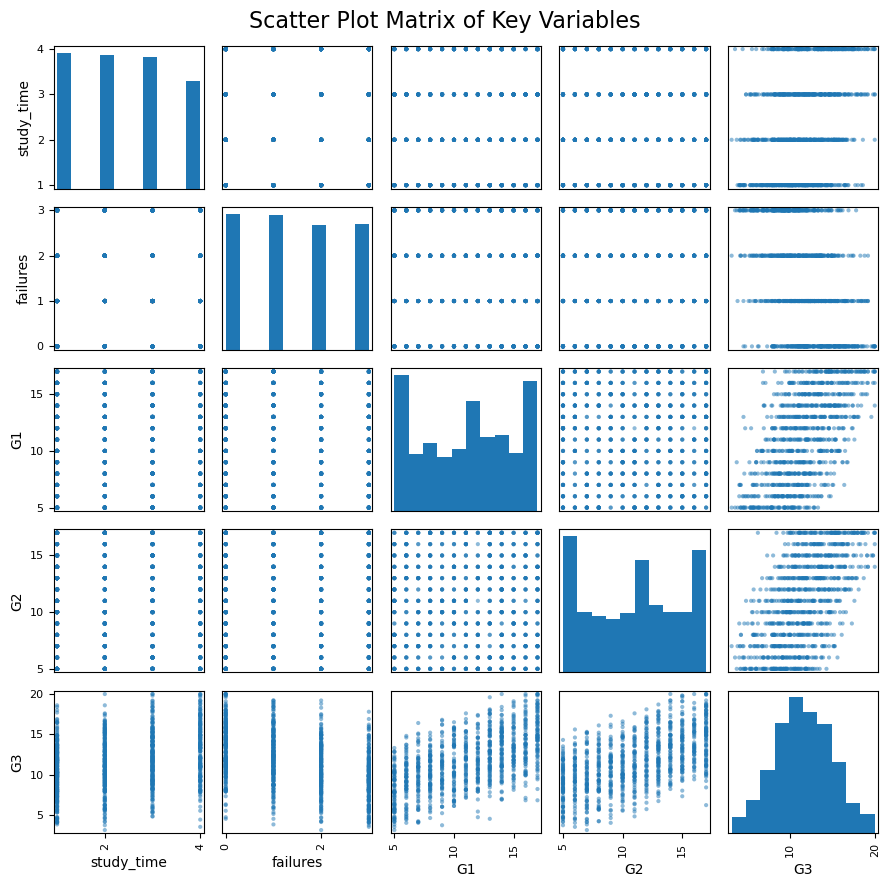

In [41]:
fig = pd.plotting.scatter_matrix(df_selected_features, figsize=(9,9), alpha=0.5, diagonal='hist')
plt.suptitle('Scatter Plot Matrix of Key Variables', fontsize=16)
plt.tight_layout()

## Categorical Data

In [42]:
categorical_cols = ['family_support', 'extra_educational_support', 'internet', 'romantic']
correlation_matx = df[categorical_cols].corr()
correlation_matx

ValueError: could not convert string to float: 'no'

In [46]:
df['family_support'] = df['family_support'].map({'yes': 1, 'no': 0})
df['extra_educational_support'] = df['extra_educational_support'].map({'yes': 1, 'no': 0})
df['internet'] = df['internet'].map({'yes': 1, 'no': 0})
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})
df

,Unnamed: 0,age,study_time,failures,family_support,extra_educational_support,internet,romantic,free_time,going_out,health,absences,G1,G2,G3
0,0,17,2,2,0,0,1,1,1,4,3,1,5,7,3.1
1,1,18,3,3,0,1,1,1,3,5,4,2,5,12,7.2
2,2,15,1,1,0,1,1,1,3,1,4,5,17,14,16.4
3,3,17,1,3,0,1,1,0,4,3,2,2,9,17,12.4
4,4,17,1,3,1,0,0,1,5,5,5,9,8,16,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,15,1,0,0,1,0,0,5,3,2,18,7,17,14.2
996,996,15,2,2,0,0,1,0,4,2,1,5,7,17,11.0
997,997,18,1,0,0,1,0,1,3,2,5,17,9,14,13.5
998,998,18,3,1,0,0,0,1,1,4,2,9,15,6,11.1


In [49]:
categorical_cols = ['family_support', 'extra_educational_support', 'internet', 'romantic', 'G3']
correlation_matx = df[categorical_cols].corr()
correlation_matx

,family_support,extra_educational_support,internet,romantic,G3
family_support,1.000000,-0.000945,0.033396,-0.029174,0.188769
extra_educational_support,-0.000945,1.000000,0.001385,-0.020404,0.053481
internet,0.033396,0.001385,1.000000,-0.030521,0.049425
romantic,-0.029174,-0.020404,-0.030521,1.000000,-0.033054
G3,0.188769,0.053481,0.049425,-0.033054,1.000000


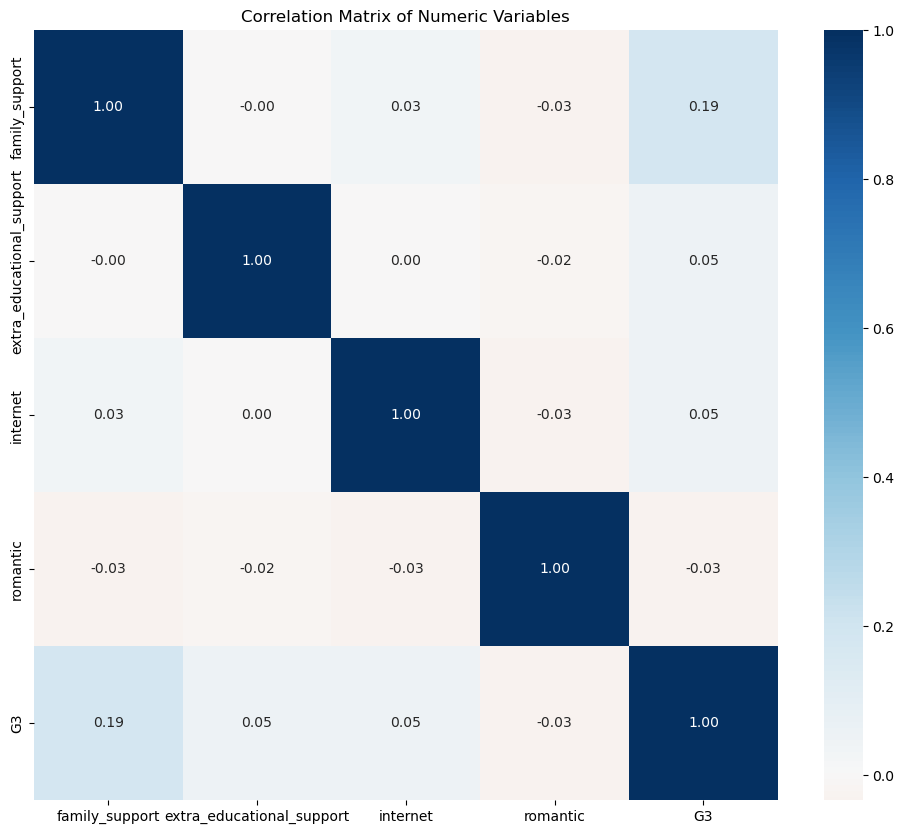

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matx, annot=True, cmap='RdBu', center=0, fmt='.2f')
plt.title('Correlation Matrix of Categorical Variables')
plt.show()

## ฉันได้รู้ว่า Features ที่มีผลได้แก่

- family_support
- study_time	
- failures	
- G1	
- G2

## Preprocessing

สิ่งที่เราต้องมีคือ: Model, Input (X), label (y), Loss function, test_set (x_test, y_test)

### train-test split
1000 ตัว -> 80% train, 20% test

In [70]:
features_column = ['family_support', 'study_time', 'failures', 'G1', 'G2', 'G3']
df = df[features_column]

## Numpy

In [55]:
g3 = df['G3'].values
g3

array([ 3.1,  7.2, 16.4, 12.4,  9.8,  6.5,  7.9, 11.8,  9.7, 17.1, 13.7,
        5.5, 11.2, 15.7, 11.7, 11.6, 15.6, 14.8,  8. , 10.3, 13.1,  9.3,
        5.1, 11.8, 15.3, 10.1,  9.9,  8.9, 10.3,  5.3, 15.2, 17.3,  6.5,
       12.4,  9. , 17.5, 14.8,  8.9, 12.9,  8.9, 11.9, 10.1,  9.9,  7.9,
        8.5,  9.5,  8.7, 11. , 12.6, 10.7, 12.9,  7.5,  8.7,  9.8,  4.1,
        5.5, 13.6, 14.5, 14. ,  8.4, 14.4,  6.4, 15.7,  6.8,  7.7,  9.4,
       12.1, 17. , 11. ,  9.6, 15.7,  6.7,  9.5,  9.3,  7.9, 13.7,  6.8,
       11.3, 14.4, 14.2, 11.7, 11.8, 10.3, 16.8, 17.6, 14.3,  9.6, 16.3,
       12.9, 15.5, 13.3, 11.7, 13.1, 11.8, 14.9,  6.8, 12.3, 10.4, 17.3,
       13.6, 15. , 16.5, 17. , 13.3, 12.5, 16. ,  7.6,  8.8,  5.5, 11.3,
        9. , 13.6, 11.1, 13.3, 14.7, 13.7, 13.7,  9.3, 12. ,  7.9, 10. ,
       16.2, 10.2, 15.7,  6.6, 14.6, 12.1, 14.9, 10.6,  7. , 16.1, 11. ,
       12.9, 19.8, 14.8, 14.8,  8.3,  8.1, 17.2, 10.6,  6.2, 10.1, 18.7,
       14.6, 19.6,  9.8, 11.4, 14.6, 12.9, 12.5, 14

In [62]:
g3.mean()
g3.std()
g3.max()
g3.min()
g3.shape
g3.argmin() # หาตำแหน่งของตัวที่น้อยที่สุด
g3.argmax() # หาตำแหน่งของตัวที่มากที่สุด

np.int64(249)

In [ ]:
g3 + 1
g3 - 1
g3 * 0
g3 / 1000
g3 ** 2

In [71]:
df

,family_support,study_time,failures,G1,G2,G3
0,0,2,2,5,7,3.1
1,0,3,3,5,12,7.2
2,0,1,1,17,14,16.4
3,0,1,3,9,17,12.4
4,1,1,3,8,16,9.8
...,...,...,...,...,...,...
995,0,1,0,7,17,14.2
996,0,2,2,7,17,11.0
997,0,1,0,9,14,13.5
998,0,3,1,15,6,11.1


In [78]:
from sklearn.model_selection import train_test_split

In [84]:
train_data, test_data = train_test_split(df, train_size=0.8)
X_train, y_train = train_data.drop('G3', axis=1), train_data['G3']
X_test, y_test = test_data.drop('G3', axis=1), test_data['G3']
print(X_train, y_train)

     family_support  study_time  failures  G1  G2
890               0           2         1  14  10
271               1           2         0  17  10
6                 0           4         3   8   6
423               1           3         0  16  16
326               1           1         1   7  13
..              ...         ...       ...  ..  ..
302               1           3         2   8  16
659               1           4         3  17  15
333               0           4         0   9   7
645               0           3         2   5  12
198               1           3         1  12   7

[800 rows x 5 columns] 890    12.5
271    16.6
6       7.9
423    20.0
326    10.3
       ... 
302    12.5
659    17.8
333    11.3
645     7.7
198    12.7
Name: G3, Length: 800, dtype: float64


### Loss Function

$$ MSE= \frac{1}{n} \sum {(\hat{y} - y)^2}$$

In [85]:
def calculate_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
model.coef_, model.intercept_ # coef = weight, intercept = bias

(array([ 0.94958553,  0.8436476 , -1.16886901,  0.49634995,  0.49152403]),
 np.float64(-0.047659581646792404))

$$ G_3 = 0.95 \times (familysupport) + 0.84 \times (studytime) - 1.17 \times (failure) + 0.49 \times (G_1) + 0.49 \times (G_2) - 0.048$$

### Test

In [93]:
y_hat = model.predict(X_test)
calculate_mse(y_test, y_hat)

np.float64(1.080167219195573)

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [98]:
print(mean_absolute_error(y_test, y_hat))
print(mean_squared_error(y_test, y_hat))
print(r2_score(y_test, y_hat))

0.8435843876498627
1.080167219195573
0.9114725588406887


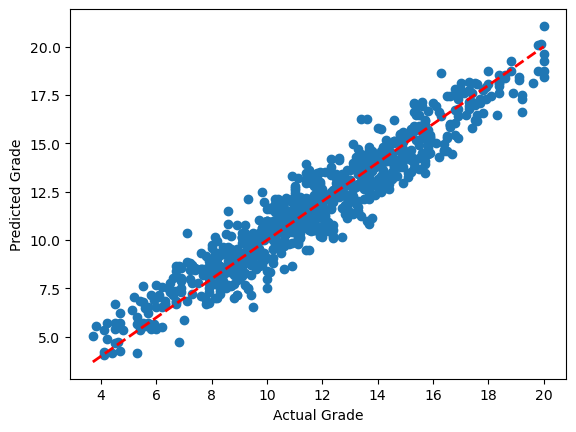

In [102]:
y_hat = model.predict(X_train)
plt.scatter(y_train, y_hat)
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')
plt.plot([y_train.min() , y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)

## Train-Test (80-20, 70-30, 60-40, 75-25)

In [106]:
for train_size in [0.5, 0.6, 0.65, 0.7, 0.8, 0.9]:
    train_data, test_data = train_test_split(df, train_size=train_size)
    X_train, y_train = train_data.drop('G3', axis=1), train_data['G3']
    X_test, y_test = test_data.drop('G3', axis=1), test_data['G3']
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    mse = calculate_mse(y_test, y_hat)
    print(train_size, ': ', mse)

0.5 :  1.0610316996993527
0.6 :  1.1148983147038904
0.65 :  1.2095167864906826
0.7 :  1.1892556499496543
0.8 :  1.208997086687154
0.9 :  0.9857898268895786
